<a href="https://colab.research.google.com/github/taticorrea/astropytutorialsptbr/blob/main/quantities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Usando Astropy Quantities e Units para cálculos astrofísicos

## Autores
Ana Bonaca, Erik Tollerud, Jonathan Foster, Lia Corrales, Kris Stern, Stephanie T. Douglas

## Tradução
Tatiane Corrêa


## Metas de aprendizagem
* Usar objetos do tipo `Quantity` para estimar a massa de uma galáxia hipotética
* Tirar proveito das constantes usando a bibioteca `astropy.constants`
* Imprimir unidades em formato de strings
* Fazer gráficos de objetos do tipo `Quantity` com rótulos de unidades, utilizando `astropy.visualization.quantity_support`
* Fazer operações matemáticas com objetos do tipo `Quantity`
* Converter quantidades com `astropy.units`
* Conversão entre comprimento de onda e energia com equivalências `astropy.units.spectral`
* Usar aproximação de pequenos ângulos com `astropy.units.dimensionless_angles` equivalências
* Escrever funções aplicáveis à objetos do tipo `Quantity` ao invés de arrays da biblioteca numpy
* Criar radio observações sintéticas 
* Usar objetos do tipo `Quantity`, como cubos de dados, para facilitar a derivação completa da massa total de uma nuvem molecular

## Palravas-chave
unidades, radio astronomia, cubo de dados, matplotlib

## Conteúdo Complementar
[Ferramentas para Radio Astronomia](https://www.springer.com/gp/book/9783662053942) por Rohlfs & Wilson

## Sumário

Nesse tutorial, iremos apresentar alguns exemplos para mostrar como o objeto `Quantity` do módulo Astropy pode tornar cálculos astrofísicos mais simples.
Os exemplos incluem: cálculo da massa de uma galáxia a partir da dispersão de velocidades e a determinação da massa de nuvens moleculares a partir do mapeamento da intensidade das linhas de CO. Fecharemos com um exemplo de boas práticas, que é o uso de `quantities` em funções que eventualmente você poderá distribuir para outras pessoas.
<br>
Para uma discussão mais detalhada a respeito dos objetos `Quantity`, veja a [seção de documentação do Astropy](http://docs.astropy.org/en/stable/units/quantity.html).

## Preliminares

Vamos começar carregando as bibliotecas padrão e configurando os gráficos para os notebooks ipython 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Você não deve utilizar a função seed() em um código de ciência real, mas iremos usar aqui para fins didáticos.
#A função seed() faz com que o gerador de números aleatórios sempre gere os mesmos números, onde quer que você execute.
np.random.seed(12345)

# Configuração do matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

É conveniente carregar o módulo `units` do Astropy como a variável `u`, como é mostrado abaixo. Isso irá tornar o trabalho com objetos do tipo `Quantity` muito mais fácil.<br>
<br>
Astropy também possui o módulo`constants`, onde constantes físicas típicas estão disponíveis. As constantes são armazenadas como objetos de uma subclasse `Quantity`, então se comportam como objetos `Quantity`. Aqui, precisaremos apenas da constante gravitacional `G`, da constande de Planck `h` e da constante de Boltzman `k_B`.

In [2]:
import astropy.units as u
from astropy.constants import G, h, k_B

Também mostraremos um exemplo de gráfico utilizando o pacote `astropy.visualization`, que provê suporte para unidades de objetos do tipo `Quantity`

In [3]:
from astropy.visualization import quantity_support

## 1. Massa galáctica

Neste primeiro exemplo, iremos utilizar objetos do tipo `Quantity` para estimar a massa de uma galáxia hipotética, dados seu raio de meia-luz e velocidades radiais das estrelas na galáxia.

Vamos assumir que nós medimos o raio de meia-luz da galáxia como sendo 29 pc projetado no céu à uma distância da galáxia. Esse raio é comumumente chamado de "raio efetivo", então iremos armazená-lo em um objeto do tipo `Quantity` com o nome `Reff`. A forma mais fácil de criar um objeto do tipo `Quantity` é multiplicando seu valor por uma unidade. Unidades podem ser acessadas usando u."unit", nesse caso u.pc.

In [4]:
Reff = 29 * u.pc

Uma forma completamente equivalente (mas mais verbosa) de fazer a mesma coisa é usar o inicializador de objetos do tipo `Quantity`, demonstrado abaixo. Em geral, prefira utilizar a forma simples (acima), pois está mais próxima de como a quantidade é realmente escrita no texto. A forma com o inicializador possui mais opções, as quais você pode aprender sobre com a [documentação de referência do Astropy sobre objetos do tipo `Quantity`](http://docs.astropy.org/en/stable/api/astropy.units.quantity.Quantity.html).

In [5]:
Reff = u.Quantity(29, unit=u.pc)

Podemos acessar os valores e unidades de um objeto do tipo `Quantity` utilizando os atributos `value` e `unit`.

In [6]:
print("""Raio de meia-luz
valor: {0}
unidade: {1}""".format(Reff.value, Reff.unit))

Raio de meia-luz
valor: 29.0
unidade: pc


Os atributos `value` e `unit` também podem ser acessados com a função print().

In [7]:
print(""" Raio de meia-luz
valor: {0.value}
unidade: {0.unit}""".format(Reff))

 Raio de meia-luz
valor: 29.0
unidade: pc


Além disso, podemos converter o raio em parsecs para qualquer outra unidade de comprimento utilizando o método ``to()``. Aqui vamos converter para metros.

In [48]:
print("{0:.3g}".format(Reff.to(u.m)))

8.95e+17 m


Para esse próximo exemplo, iremos primeiro criar um conjunto de dados de medidas de velocidades radiais, assumindo uma distribuição normal com uma velocidade média de 206 km/s e uma dispersão de 4.3 km/s.

In [9]:
vmean = 206
sigin = 4.3
v = np.random.normal(vmean, sigin, 500)*u.km/u.s

In [10]:
print("""Primeiras 10 medidas de velocidade radial: 
{0}
{1}""".format(v[:10], v.to(u.m/u.s)[:10]))

Primeiras 10 medidas de velocidade radial: 
[205.11975706 208.05945635 203.76641353 203.61035969 214.45285646
 211.99164508 206.39950387 207.21150846 209.30679704 211.35966937] km / s
[205119.75706422 208059.45635365 203766.41352526 203610.35969131
 214452.85646176 211991.64508178 206399.50387    207211.50845717
 209306.79704073 211359.66936646] m / s


Ocasionalmente podemos obter algum erro ao tentar graficar objetos do tipo `Quantity` com a biblioteca `matplotlib`. É sempre possível resolver este problema passando o valor do array (e.g., `v.value`) nas funções do `matplotlib`. No entanto, chamar a função `astropy.visualization.quantity_support()` irá mudar as configurações da sua sessão do `matplotlib` para lidar melhor com objetos do tipo `Quantity`:

In [11]:
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7f75db389590>

Agora podemos graficar um histograma do conjunto de dados de velocidade. Note que, devido a chamada da função `quantity_support()`, o eixo-x é automaticamente rotulado com as unidades corretas.

Text(0, 0.5, 'N')

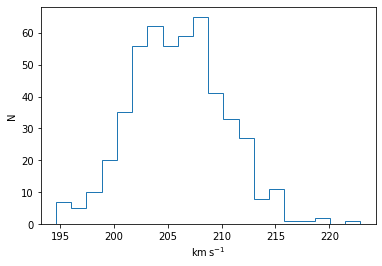

In [12]:
plt.figure()
plt.hist(v, bins='auto', histtype="step")
plt.ylabel("N")

Agora podemos calcular a dispersão de velocidades da galáxia. Isso demonstra como você pode executar operações básicas como subtração e divisão com objetos do tipo `Quantity`, e também usá-los como input de funções padrão do `numpy` como `mean()` e `size()`. Eles mantêm suas unidades através dessas operações, como esperávamos. 

In [13]:
sigma = np.sqrt(np.sum((v - np.mean(v))**2) / np.size(v))
print("Dispersão das velocidades: {0:.2f}".format(sigma))

Dispersão das velocidades: 4.36 km / s


Note que precisamos usar a função raiz quadrada do `numpy`, porque a quantidade dispersão de velocidades é um array do`numpy`. Se ao invés disso você utilizou a função `sqrt()` da biblioteca padrão do python `math`, e/ou a função padrão `sum()` do python, vai obter um erro.

In [57]:
from math import sqrt
sigma_scalar = sqrt(sum((v - np.mean(v))**2) / len(v)) #não faça isso dessa maneira - use a versão abaixo!

TypeError: ignored

In [14]:
sigma_scalar = np.sqrt(np.sum((v - np.mean(v))**2) / len(v))

Em geral, você deve utilizar apenas funções do `numpy` com objetos do tipo `Quantity`, e *não* as funções equivalentes da biblioteca `math`, a não ser que você tenha certeza de que entendeu as consequências.

Agora vamos calcular a massa real. Se uma galáxia é mantida pela pressão (por exemplo, uma galáxia elíptica ou esferoidal), a massa que está contida na extensão estrelar pode ser estimada utilizando uma equação simples: $M_{1/2}=4\sigma^2 R_{eff}/G$.  Existem algumas ressalvas para o uso desta equação  -- para mais detalhes, ver Wolf et al. 2010. Para uma demonstração didática dos objetos do tipo `Quantity`, você pode aceitar que esta equação geralmente é boa o suficiente. Para o cálculo, nós podemos multiplicar as quantidades juntas e o `astropy` irá acompanhar as unidades.

In [15]:
M = 4*sigma**2*Reff/G
M

<Quantity 3.30848411e+13 kg km2 pc / m3>

Esse resultado é uma composição de unidades, e não é tão óbvio perceber que ele está em unidades de massa. No entanto, as unidades podem ser decompostas para cancelar todas as unidades de comprimento ($km^2 pc/m^3$) usando o método `decompose()`.

In [16]:
M.decompose()

<Quantity 1.02089152e+36 kg>

Também podemos facilmente expressar a massa em qualquer outra unidade que você assim desejar -- massas solares são comuns em astronomia, ou talvez você queira as unidades padrão SI e CGS.

In [17]:
print("""Massa da Galáxia
em unidades solares: {0:.3g}
unidades do SI: {1:.3g}
unidades do CGS: {2:.3g}""".format(M.to(u.Msun), M.si, M.cgs))

Massa da Galáxia
em unidades solares: 5.13e+05 solMass
unidades do SI: 1.02e+36 kg
unidades do CGS: 1.02e+39 g


Ou, se você quer o log da massa, você pode utilizar ``np.log10()``, uma vez que argumentos de logaritmos são adimensionais.

In [18]:
np.log10(M.to_value(u.Msun))

5.7104736875684186

Contudo, você não pode tomar o log de algo com unidaes, pois isso não é matematicamente sensato.

In [19]:
np.log10(M)

UnitTypeError: ignored

## Exercícos

Use um objeto do tipo `Quantity` e a lei de Kepler na forma abaixo para determinar a velocidade orbital (circular) da Terra ao redor do Sol em km/s. Não é preciso procurar os valores de constantes ou fatores de conversão para fazer esse cálculo -- está tudo dentro dos módulos `astropy.units` e `astropy.constants`.

$$v = \sqrt{\frac{G M_{\odot}}{r}}$$

Existe um jeito muito mais fácil de descobrir a velocidade da Terra usando apenas duas unidades ou quantidades. Faça isso e então compare com a resposta da lei de Kepler (a forma mais fácil provavelmente é calcular a diferença percentual, caso exista alguma).

(Completamente opcional, mas é uma boa maneira de convencer a você mesmo sobre o valor do objeto `Quantity`:) Faça os cálculos acima na mão -- você pode utilizar uma calculadora (ou python apenas para a aritmética) mas procure todos os fatores de conversão e utilize a abordagem papel-lápis para acompanhar todos eles. Qual abordagem demorou mais?

## 2. Massa de uma nuvem molecular

Nesse segundo exemplo, nós vamos demonstrar como utilizar objetos do tipo `Quantity` pode facilitar uma derivação completa da massa total de uma nuvem molecular usando radio observações de isótopos de Monóxido de Carbono (CO).

#### Configurando o cubo de dados

Vamos assumir que nós mapeamos a parte interna de uma nuvem molecular na transição rotacional J=1-0 do ${\rm C}^{18}{\rm O}$, e estamos interessados em medir sua massa total. A medida produz um cubo de dados com RA e Dec como coordenadas espacials, e na terceira dimensão a velocidade. Cada voxel no cubo de dados representa a temperatura de brilho da emissão naquela posição e velocidade. Além disso, iremos assumir que nós temos uma medida independente de distância até a nuvem $d=250$ pc e a temperatura de excitação é conhecida e constante em toda nuvem $T_{ex}=25$ K.

In [20]:
d = 250 * u.pc
Tex = 25 * u.K

Nós iremos gerar um conjunto de dados sintético, assumindo que a nuvem segue uma distribuição Gaussiana em cada um dos eixos RA, Dec e velocidade. Vamos começar criando um numpy array de dimensões 100x100x300,  tal que a primeira coordenada é a ascenção reta, a segunda a declinação e a terceira a velocidade. Vamos usar a função `numpy.meshgrid()` para criar cubos de dados para cada uma das três coordenadas, e então usá-las na fórmula da Gaussiana para gerar um array com o cubo de dados sintéticos. Nesse cubo, a nuvem é posicionada no centro, com $\sigma$ e o centro em cada dimensão mostrados abaixo. Note em particular que, $\sigma$ para RA e Dec possuem diferentes unidades do centro, mas automaticamente o `astropy` realiza conversões relevantes antes de computar a exponencial.

In [21]:
# Centro da nuvem
cen_ra = 52.25 * u.deg
cen_dec = 0.25 * u.deg
cen_v = 15 * u.km/u.s

# Tamanho da nuvem
sig_ra = 3 * u.arcmin
sig_dec = 4 * u.arcmin
sig_v = 3 * u.km/u.s

#quantidades de coordenadas 1D
ra = np.linspace(52, 52.5, 100) * u.deg
dec = np.linspace(0, 0.5, 100) * u.deg
v = np.linspace(0, 30, 300) *u.km/u.s

#isso cria o cubo de dados de tamanho específico para cada coordenada baseado nas dimensões da outra coordenada
ra_cube, dec_cube, v_cube = np.meshgrid(ra, dec, v)

data_gauss = np.exp(-0.5*((ra_cube-cen_ra)/sig_ra)**2 + 
                    -0.5*((dec_cube-cen_dec)/sig_dec)**2 + 
                    -0.5*((v_cube-cen_v)/sig_v)**2 )

As unidades da exponencial são adimensionais, então multiplicamos o cubo de dados por K para obter as unidades de temperatura de brilho. Os radioastrônomos usam um conjunto bastante estranho de unidades [K km/s] como de intensidade integrada (isto é, somando toda a emissão de uma linha sobre a velocidade). Como um aparte para os especialistas, estamos configurando nosso cubo artificial na escala de temperatura do feixe principal (T$_{\rm MB}$), que é o mais próximo que normalmente podemos chegar da temperatura de brilho real de nossa fonte.

In [22]:
data = data_gauss * u.K

Nós também iremos precisar saber a largura de cada bin de velocidade e o tamanho de cada pixel, então vamos calcular isso agora!

In [23]:
# Tamanho médio do pixel
# Isso só estará correto se  dec ~ 0, devido o fator cos(dec).
dra = (ra.max() - ra.min()) / len(ra)
ddec = (dec.max() - dec.min()) / len(dec)

#Largura do bin de velocidade média
dv = (v.max() - v.min()) / len(v)
print("""dra = {0}
ddec = {1}
dv = {2}""".format(dra.to(u.arcsec), ddec.to(u.arcsec), dv))

dra = 18.0 arcsec
ddec = 18.0 arcsec
dv = 0.1 km / s


Estamos interessados ​​na intensidade integrada em todos os canais de velocidade, então vamos criar uma matriz 2D de quantidades somando nosso cubo de dados ao longo do eixo de velocidade (multiplicando pela largura da velocidade de um pixel).

In [24]:
intcloud = np.sum(data*dv, axis=2)
intcloud.unit

Unit("K km / s")

Podemos graficar a quantidade 2D usando a função `imshow()` do `matplotlib`, passando o valor da quantidade. Da mesma forma, podemos definir a extensão correta usando os valores de $x_i$ e $x_f$. Finalmente, podemos definir o rótulo da barra de cores para obter as unidades apropriadas.

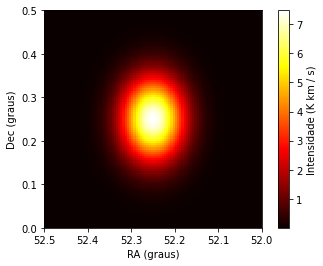

In [25]:
#Note que exibimos RA na forma convencional, indo do max ao min
plt.imshow(intcloud.value, 
           origin='lower', 
           extent=[ra.value.max(), ra.value.min(), dec.value.min(), dec.value.max()], 
           cmap='hot', 
           interpolation='nearest', 
           aspect='equal')
plt.colorbar().set_label("Intensidade ({})".format(intcloud.unit))
plt.xlabel("RA (graus)")
plt.ylabel("Dec (graus)");

#### Medindo a densidade da coluna de CO

Para calcular a massa da nuvem molecular, precisamos medir sua densidade de coluna. Uma série de premissas são necessárias para o cálculo a seguir; o mais importante é que a emissão é opticamente fina (tipicamente verdadeira para ${\rm C}^{18}{\rm O}$) e que as condições de equilíbrio termodinâmico local se mantêm ao longo da linha de visão. No caso em que a temperatura é grande em comparação com a separação em níveis de energia para uma molécula e a fonte preenche o feixe principal do telescópio, a densidade total da coluna para ${\rm C}^{13}{\rm O}$ é

$N=C \frac{\int T_B(V) dV}{1-e^{-B}}$

onde as constantes $C$ e $B$ são dadas por:

$C=3.0\times10^{14} \left(\frac{\nu}{\nu_{13}}\right)^2 \frac{A_{13}}{A} {\rm K^{-1 } cm^{-2} \,km^{-1} \,s}$

$B=\frac{h\nu}{k_B T}$

(Rohlfs & Wilson [Ferramentas para Radioastronomia](https://www.springer.com/gp/book/9783662053942)).

Aqui, demos uma expressão para $C$ dimensionada para os valores de ${\rm C}^{13}{\rm O}$ ($\nu_{13}$ e $A_{13}$). Para usar essa relação para ${\rm C}^{18}{\rm O}$, precisamos redimensionar as frequências ${\nu}$ e os coeficientes de Einstein $A$. $C$ está em unidades mistas engraçadas, mas tudo bem. Vamos defini-lo como um objeto do tipo `Quantities` e não temos que nos preocupar com isso.

Primeiro, procuramos o comprimento de onda dessas linhas de emissão e as armazenamos como quantidades.

In [26]:
lambda13 = 2.60076 * u.mm
lambda18 = 2.73079 * u.mm

Como o comprimento de onda e a frequência da luz estão relacionados usando a velocidade da luz, podemos fazer uma conversão entre eles. No entanto, fazer isso apenas usando o método `to()` falha, pois as unidades de comprimento e frequência não são conversíveis:

In [27]:
nu13 = lambda13.to(u.Hz)
nu18 = lambda18.to(u.Hz)

UnitConversionError: ignored

Felizmente, o `astropy` vem em socorro ao fornecer um recurso chamado "equivalências de unidades". As equivalências fornecem uma maneira de converter entre duas unidades fisicamente diferentes que normalmente não são equivalentes, mas em um determinado contexto têm um mapeamento de um para um. Para mais informações sobre equivalências, veja a [seção de equivalências da documentação do astropy](http://docs.astropy.org/en/stable/units/equivalencies.html).

Neste caso, chamar a função ``astropy.units.spectral()`` fornece as equivalências necessárias para lidar com conversões entre comprimento de onda e frequência. Para usá-lo, forneça as equivalências para a palavra-chave `equivalências` da chamada ``to()``:

In [28]:
nu13 = lambda13.to(u.Hz, equivalencies=u.spectral())
nu18 = lambda18.to(u.Hz, equivalencies=u.spectral())

Em seguida, procuramos os coeficientes de Einstein (em unidades de s$^{-1}$) e calculamos as razões na constante $C$. Observe como as razões de frequência e as unidades do coeficiente de Einstein são adimensionais, de modo que a unidade de $C$ permanece inalterada.

In [29]:
nu13 = 115271096910.13396 * u.Hz
nu18 = 109782318669.689 * u.Hz
A13 = 7.4e-8 / u.s
A18 = 8.8e-8 / u.s

C = 3e14 * (nu18/nu13)**3 * (A13/A18) / (u.K * u.cm**2 * u.km *(1/u.s))
C

<Quantity 2.17924582e+14 s / (cm2 K km)>

Agora vamos para calcular a constante $B$. Isso é dado pela razão de $\frac{h\nu}{k_B T}$, onde $h$ é a constante de Planck, $k_B$ é a constante de Boltzmann, $\nu$ é a frequência de emissão e $T$ é a temperatura de excitação. As constantes foram importadas de `astropy.constants`, e os outros dois valores já estão calculados, então aqui nós apenas pegamos a razão.

In [30]:
B = h * nu18 / (k_B * Tex)

As unidades de $B$ são Hz s, que podem ser decompostas em uma unidade adimensional se você realmente se importa com seu valor. Normalmente, isso não é necessário. As quantidades são melhores se você usá-las sem se preocupar com unidades intermediárias e só converter no final quando quiser uma resposta final.

In [31]:
print('{0}\n{1}'.format(B, B.decompose()))

0.21074881298143522 Hz s
0.21074881298143522


Neste ponto, temos todos os ingredientes para calcular a densidade numérica das moléculas de $\rm CO$ nesta nuvem. Já integramos (somamos) os canais de velocidade acima para mostrar o mapa de intensidade integrado, mas faremos novamente aqui para maior clareza. Isso nos dá a densidade da coluna de CO para cada pixel espacial em nosso mapa. Podemos então imprimir a densidade da coluna da coluna de pico.

In [32]:
NCO = C * np.sum(data*dv, axis=2) / (1 - np.exp(-B))
print("Pico da densidade da coluna de CO: ")
np.max(NCO)

Pico da densidade da coluna de CO: 


<Quantity 8.5782091e+15 1 / cm2>

#### CO para Massa Total

Estamos usando o CO como rastreador para os muito mais numerosos H$_2$, a quantidade que estamos tentando inferir. Como a maior parte da massa está em H$_2$, calculamos a densidade da coluna multiplicando a densidade da coluna CO pela razão H$_2$/CO (conhecida/assumida).

In [33]:
H2_CO_ratio = 5.9e6
NH2 = NCO * H2_CO_ratio
print("Pico da densidade da coluna de H2: ")
np.max(NH2)

Pico da densidade da coluna de H2: 


<Quantity 5.06114337e+22 1 / cm2>

Essa é uma densidade de coluna de pico de aproximadamente 50 magnitudes de extinção visual (assumindo a conversão entre N$_{\rm H_2}$ e A$_V$ de Bohlin et al. 1978), o que parece razoável para uma nuvem molecular.

Obtemos a densidade de massa da coluna multiplicando a densidade numérica da coluna pela massa de uma molécula H$_2$ individual.

In [34]:
mH2 = 2 * 1.008 * u.Dalton  #massa atomica unit/amu
rho = NH2 * mH2

Um passo final para passar da densidade da coluna para a massa é somar a área da área. Se fizermos isso da maneira direta (comprimento x largura de um pixel), essa área estará em unidades de ${\rm deg}^2$.

In [35]:
dap = dra * ddec
print(dap)

2.5e-05 deg2


Agora vem uma sutileza importante: na aproximação de pequenos ângulos, multiplicar a área do pixel pelo quadrado da distância resulta na área da seção transversal da nuvem que o pixel cobre, em unidades *físicas*, em vez de unidades angulares. Portanto, é tentador apenas multiplicar a área e o quadrado da distância.

In [36]:
da = dap * d**2  #não faça isso dessa maneira - use a versão abaixo!
print(da)

1.5625 deg2 pc2


In [37]:
dap.to(u.steradian).value * d**2

<Quantity 0.00047596 pc2>

Mas isso é **errado**, porque `astropy.units` trata os ângulos (e ângulos sólidos) como unidades físicas reais, enquanto a aproximação de ângulos pequenos assume que os ângulos não têm dimensão. Portanto, se você, por exemplo, tentar converter para uma unidade de área diferente, falhará:

In [38]:
da.to(u.cm**2)

UnitConversionError: ignored

A solução é usar a equivalência `dimensionless_angles()`, que permite que os ângulos sejam tratados como adimensionais. Isso faz com que eles sejam convertidos automaticamente para radianos e se tornem adimensionais quando uma conversão for necessária.

In [39]:
da = (dap * d**2).to(u.pc**2, equivalencies=u.dimensionless_angles())
da

<Quantity 0.00047596 pc2>

In [40]:
da.to(u.cm**2)

<Quantity 4.53185339e+33 cm2>

Finalmente, multiplicando a densidade da coluna pela área do pixel e somando todos os pixels, temos a massa da nuvem.

In [41]:
M = np.sum(rho * da)
M.decompose().to(u.solMass)

<Quantity 317.64843091 solMass>

## Exercícios

O conteúdo astronômico era bem pesado naquele outro exercício, então vamos focar em algumas estatísticas associadas usando os recursos de array do `Quantity`. Calcule a mediana e a média dos `data` com as funções ``np.mean()`` e ``np.median()``. Por que seus valores são tão diferentes?

Da mesma forma, calcule o desvio padrão e a variância (se você não conhece as funções relevantes, procure nos documentos numpy ou apenas digite np.<tab> e uma célula de código). Eles têm as unidades que você espera?

## 3. Usando quantidades com funções

`Quantity` também é uma ferramenta útil se você planeja compartilhar parte do seu código, seja com colaboradores ou com a comunidade em geral. Ao escrever funções que recebem objetos `Quantity` em vez de números brutos ou matrizes, você pode escrever um código independente da unidade de entrada. Dessa forma, você pode até evitar [a destruição de orbitadores de Marte](http://en.wikipedia.org/wiki/Mars_Climate_Orbiter#Cause_of_failure). Abaixo, fornecemos um exemplo simples.

Suponha que você esteja trabalhando em um instrumento e a pessoa que o financia solicite uma função para fornecer uma estimativa analítica da função resposta. Você determina a partir de alguns testes que é basicamente um Lorentziano, mas com uma escala diferente ao longo dos dois eixos. Seu primeiro pensamento pode ser fazer isso:

In [42]:
def response_func(xinarcsec, yinarcsec):
    xscale = 0.9
    yscale = 0.85
    xfactor = 1 / (1 + xinarcsec/xscale)
    yfactor = 1 / (1 + yinarcsec/yscale)
    
    return xfactor * yfactor

Você queria que as entradas estivessem em arcsec, mas, infelizmente, você envia isso para seu colaborador e eles não olham de perto e acham que as entradas deveriam estar em arcmin. Então eles fazem:

In [43]:
response_func(1.0, 1.2)

0.19640564826700893

E agora eles dizem a todos os seus amigos o quão terrível é o instrumento, porque deveria ter uma resolução de segundo de arco, mas sua função mostra claramente que só pode resolver um arcmin na melhor das hipóteses. Mas você pode resolver isso exigindo que eles passem objetos `Quantity`. A nova função poderia ser simplesmente:

In [44]:
def response_func(x, y):
    xscale = 0.9 * u.arcsec
    yscale = 0.85 * u.arcsec
    xfactor = 1 / (1 + x/xscale)
    yfactor = 1 / (1 + y/yscale)
    
    return xfactor * yfactor

E seu colaborador agora tem que prestar atenção. Se eles apenas colocarem um número às cegas, receberão um erro:

In [ ]:
response_func(1.0, 1.2)

Qual é a sugestão deles para fornecer as unidades explicitamente:

In [46]:
response_func(1.0*u.arcmin, 1.2*u.arcmin)

<Quantity 0.00017243>

A agência financiadora fica impressionada com a resolução que você alcançou e seu instrumento está salvo! Você agora ganha o Prêmio Nobel devido às descobertas que o instrumento faz. E foi tudo porque você usou `Quantity` como a entrada do código que você compartilhou.

## Exercício

Escreva uma função que calcule a velocidade Kepleriana que você calculou na seção 1 (usando entradas e saídas `Quantity`, é claro), mas permitindo uma massa e um raio orbital arbitrários. Experimente com alguns números razoáveis ​​para satélites orbitando a Terra, uma lua de Júpiter ou um planeta extra-solar. Sinta-se à vontade para usar a wikipedia ou similar para as massas e distâncias.